## Overview

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

THIS project i also done on KAGGLE , i use kaggle data to create an app on streamlit.

You can click on the link to see the live app work:


In [45]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,root_mean_squared_error
import xgboost as xg
from xgboost import XGBClassifier

In [46]:
data = pd.read_csv("creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [49]:
X = data.drop("Class",axis=1)
y = data["Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (227845, 30)
X_test : (56962, 30)
y_train : (227845,)
y_test : (56962,)


# Train the model

In [50]:
model = XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.1,)
model_XG = model.fit(X_train,y_train)

In [51]:
xg_pred = model_XG.predict(X_test)
xg_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(56962,))

In [52]:
xg_prob =model_XG.predict_proba(X_test)[:,1] ## these the fraud probability used for roc_aoc_score
xg_prob

array([9.9995768e-01, 1.2302727e-05, 2.8011184e-05, ..., 3.1418804e-05,
       1.6768088e-06, 1.6307338e-05], shape=(56962,), dtype=float32)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(f"Classification Report :\n {classification_report(y_test,xg_pred)}")
print(f"Accuracy : {accuracy_score(y_test,y_pred=xg_pred)}")
print(f"ROC_AOC_score : {roc_auc_score(y_test,xg_prob)}")
print(f"confusion_matrix :\n {confusion_matrix(y_test,xg_pred)}")
auc =roc_auc_score(y_test,xg_prob)

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy : 0.9996313331694814
ROC_AOC_score : 0.9819210604894743
confusion_matrix :
 [[56862     2]
 [   19    79]]


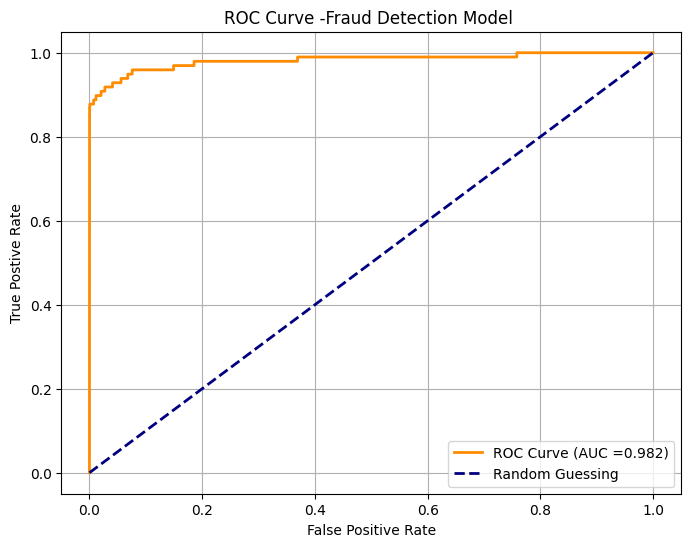

In [54]:
import matplotlib.pyplot as plt
fpr ,tpr ,thresholds = roc_curve(y_test,xg_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color ="darkorange",lw= 2,label = f"ROC Curve (AUC ={auc:.3f})")
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle ='--',label ='Random Guessing')
plt.title("ROC Curve -Fraud Detection Model ")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Save the Model


In [56]:
import joblib
# Save model
joblib.dump(model_XG, "xgb_fraud_model.pkl")

['xgb_fraud_model.pkl']